In [2]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import numpy as np

## Датасет об этих прекрасных морских обитателях 
![title](1.jpg)

In [3]:
# Сохраним датасет
df = pd.read_csv('abalone.csv', names = 
                 ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                  'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'])

Сформулием первую гипотезу

H0: a = b; H1: a != b

a - средний диаметр раковины у infant (насколько я поняла, это что-то типа личинок, некая "детская" форма, но возраст у них может быть и достаточно большой), b - средний диаметр раковины у взрослых ушек

In [4]:
# Применим z-test для двух независимых выборок
X_1 = df[df.Sex == 'I'].Diameter
X_2 = df[df.Sex != 'I'].Diameter
# Посчитаем z-статистику:
z = (X_1.mean() - X_2.mean())/(np.sqrt(X_1.std()**2/X_1.count() + X_2.std()**2/X_2.count()))
print(z)
# Доверительная область уровня значимости 0.05: (-1.96, 1.96) 

-42.45457241339881


Так как значение статистики попало в критическую область, есть основания отвергнуть нулевую гипотезу

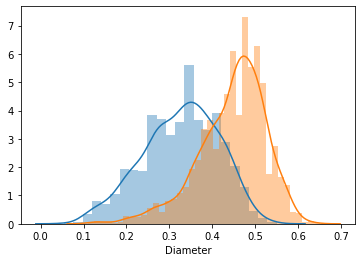

In [5]:
# нарисуем распределения, чтобы видеть, что средние действительно отличаются
sns.distplot(df[df.Sex == 'I'].Diameter);
sns.distplot(df[df.Sex != 'I'].Diameter);

Сформулируем вторую гипотезу:

H0: a = b; H1: a != b

a - средний диаметр раковины у женских особей, b - средний диаметр раковины у мужских особей

In [6]:
# Применим z-test для двух независимых выборок
X_1 = df[df.Sex == 'F'].Diameter
X_2 = df[df.Sex == 'M'].Diameter
# Посчитаем z-статистику:
z = (X_1.mean() - X_2.mean())/(np.sqrt(X_1.std()**2/X_1.count() + X_2.std()**2/X_2.count()))
print(z)
# Доверительная область уровня значимости 0.05: (-1.96, 1.96) 

5.293544096523467


Так как значение статистики попало в критическую область, есть основания отвергнуть нулевую гипотезу

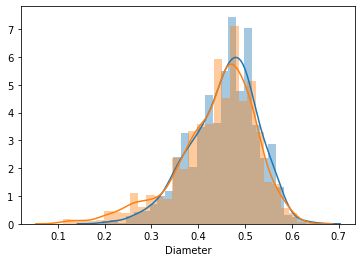

In [7]:
# нарисуем графики, чтобы посмотреть, насколько отличаются средние
sns.distplot(df[df.Sex == 'F'].Diameter);
sns.distplot(df[df.Sex == 'M'].Diameter);

Согласно википедии, средний размер морского ушка равен 6 см, в нашем датасете размеры указаны, видимо, в дециметрах (что странно, ведь в описании к датасету указано, что величины в мм, но даже по картинке к датасету видно, что это не микробы какие-то, а вполне себе большие существа, поэтому я решила считать, что здесь все в дециметрах)

Проверим гипотезу о том, что среднее действительно 6, применяя z-test.

In [33]:
X = df.Length
# Посчитаем z-статистику:
z = X.count()*(X.mean() - 0.6)/(X.std())
print(z)
# Доверительная область уровня значимости 0.05: (-1.96, 1.96) 

-2643.6614219735197


Статистика не попадает в доверительную облать, значит гипотезу можно отклонить. 

Возможно, если мы уберем из выборки "детей", что-то изменится:

In [19]:
X = df[df.Sex != 'I'].Length
# Посчитаем z-статистику:
z = X.count()*(X.mean() - 0.6)/(X.std())
print(z)
# Доверительная область уровня значимости 0.05: (-1.96, 1.96) 

-900.8490496917295


Но все же гипотеза отклоняется

Проверим, что диаметр ушка в подгруппах для разного количества колец распределен нормально с помощью Шапиро теста на нормальность.

In [83]:
# Для каждого уникального значения количества колец проверяется нормальность диаметра
print('Диаметр ушек со следуюим количество колец распределен нормально: ')
for n_rings in df.Rings.unique():
    if df[df.Rings == n_rings].shape[0] > 10:
        X = df[df.Rings == n_rings].Diameter
        if scipy.stats.shapiro(X)[1] > 0.05:
            print('Количество колец: ', n_rings, '; P-value: ', scipy.stats.shapiro(X)[1], sep = '')

Диаметр ушек со следуюим количество колец распределен нормально: 
Количество колец: 15; P-value: 0.1836283951997757
Количество колец: 7; P-value: 0.13748900592327118
Количество колец: 20; P-value: 0.1668461412191391
Количество колец: 16; P-value: 0.3801758885383606
Количество колец: 19; P-value: 0.30312472581863403
Количество колец: 14; P-value: 0.8830718994140625
Количество колец: 18; P-value: 0.21632082760334015
Количество колец: 13; P-value: 0.058873530477285385
Количество колец: 5; P-value: 0.11608731746673584
Количество колец: 4; P-value: 0.23917151987552643
Количество колец: 21; P-value: 0.6991474032402039
Количество колец: 17; P-value: 0.1649337112903595
Количество колец: 3; P-value: 0.7945278286933899


In [84]:
# Для каждого уникального значения количества колец проверяется нормальность веса
print('Вес ушек со следуюим количество колец распределен нормально: ')
for n_rings in df.Rings.unique():
    if df[df.Rings == n_rings].shape[0] > 10:
        X = df[df.Rings == n_rings].Whole_weight
        if scipy.stats.shapiro(X)[1] > 0.05:
            print('Количество колец: ', n_rings, '; P-value: ', scipy.stats.shapiro(X)[1], sep = '')

Вес ушек со следуюим количество колец распределен нормально: 
Количество колец: 20; P-value: 0.05145910382270813
Количество колец: 16; P-value: 0.4220503568649292
Количество колец: 18; P-value: 0.879175066947937
Количество колец: 21; P-value: 0.6168493628501892
Количество колец: 3; P-value: 0.23852480947971344


In [85]:
# Для каждого уникального значения количества колец проверяется нормальность веса
print('Вес ракушки ушек со следуюим количество колец распределен нормально: ')
for n_rings in df.Rings.unique():
    if df[df.Rings == n_rings].shape[0] > 10:
        X = df[df.Rings == n_rings].Shell_weight
        if scipy.stats.shapiro(X)[1] > 0.05:
            print('Количество колец: ', n_rings, '; P-value: ', scipy.stats.shapiro(X)[1], sep = '')

Вес ракушки ушек со следуюим количество колец распределен нормально: 
Количество колец: 15; P-value: 0.06972721219062805
Количество колец: 20; P-value: 0.08470427244901657
Количество колец: 16; P-value: 0.11924482882022858
Количество колец: 19; P-value: 0.26395320892333984
Количество колец: 11; P-value: 0.23172488808631897
Количество колец: 13; P-value: 0.4099978506565094
Количество колец: 21; P-value: 0.7114374041557312
Количество колец: 3; P-value: 0.23059608042240143


Покажем, что shapiro тест работает корректно, для этого сгенерируем несколько нормальных и ненормальных выборок

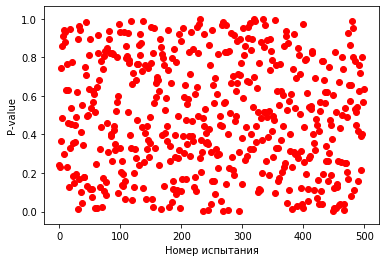

In [75]:
# в случае верности нулевой гипотезы, p-value распределен равномерно
samples_1, p_value = [], []
for i in range(500):
    samples_1.append(np.random.normal(0, 1, 100))
for sample_1 in samples_1:
    p_value.append(scipy.stats.shapiro(sample_1)[1])
fig, ax = plt.subplots()
plt.scatter(x=[i for i in range(len(p_value))], y=p_value, c='r');
ax.set_xlabel('Номер испытания');
ax.set_ylabel('P-value');

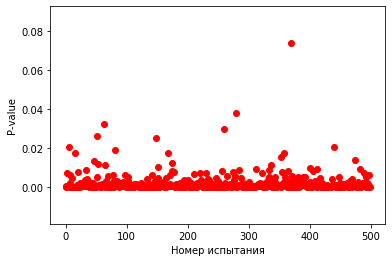

In [78]:
# в случае верности альтернативной гипотезы видно, что p-value смещен
samples_1, p_value = [], []
for i in range(500):
    samples_1.append(np.random.uniform(-1, 1, 100))
for sample_1 in samples_1:
    p_value.append(scipy.stats.shapiro(sample_1)[1])
fig, ax = plt.subplots()
plt.scatter(x=[i for i in range(len(p_value))], y=p_value, c='r');
ax.set_xlabel('Номер испытания');
ax.set_ylabel('P-value');